In [10]:
import numpy as np

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras
print("keras version", tf)

keras version <module 'tensorflow' from '/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/__init__.py'>


In [13]:
import matplotlib.pyplot as plt

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
y_train_full.shape

(60000,)

In [19]:
X_valid = X_train_full[:5000]/255.

In [20]:
y_valid = y_train_full[:5000]/255.

In [21]:
X_train = X_train_full[5000:]/255.

In [22]:
y_train = y_train_full[5000:]/255.

In [23]:
print("Train data shape:",X_train.shape)
print("Validation data shape:", X_valid.shape)
print("Test data shape:", X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [24]:
X_test = X_test/255.

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 0.01568627450980392
Class name is: T-shirt/top


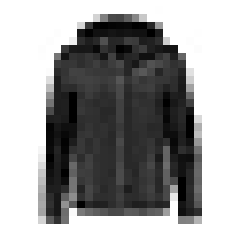

In [26]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[0])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not numpy.float64

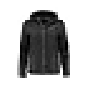

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [29]:
keras.backend.clear_session()

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [31]:
model.layers

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


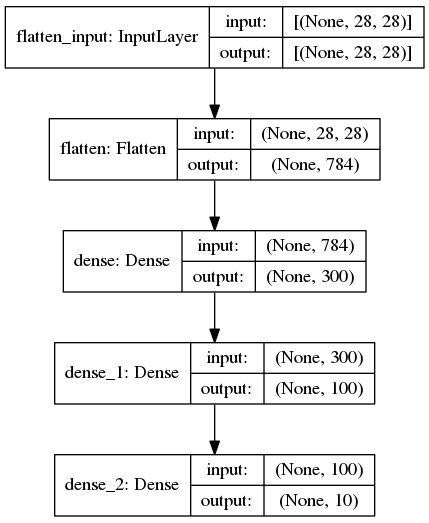

In [33]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [34]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd, 
              metrics=["accuracy"])